In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data Exploration
dataset1 = pd.read_csv("games.csv") #Dataset 1
dataset1.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [4]:
dataset2 = pd.read_csv("Top 1000 Steam Games 2023 COPY export 2025-01-06 23-42-05.csv") #Dataset 2
dataset2.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,216345,5530,0,"10,000,000 .. 20,000,000",0,0,0,0,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6472,990,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272..."
2,30,Day of Defeat,Valve,Valve,NaN,5686,634,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2242,490,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,17468,890,0,"2,000,000 .. 5,000,000",0,0,0,0,499,499,0,"English, French, German, Korean",Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S..."


In [5]:
#Merge Datasets
# Normalize column names to lowercase for consistent processing
dataset1.columns = dataset1.columns.str.lower()
dataset2.columns = dataset2.columns.str.lower()

# Check if required columns exist in both files
required_columns_file1 = ['name', 'supported languages', 'full audio languages', 
                          'windows', 'mac', 'linux', 'achievements', 'genres', 'price']
required_columns_file2 = ['name', 'positive', 'negative', 'owners', 'ccu', 'tags']

if all(col in dataset1.columns for col in required_columns_file1) and all(col in dataset2.columns for col in required_columns_file2):
    # Select only the required columns
    dataset1_selected = dataset1[required_columns_file1]
    dataset2_selected = dataset2[required_columns_file2]

    # Merge the two DataFrames on the 'name' column
    combined_df = pd.merge(dataset1_selected, dataset2_selected, on='name', how='inner')

    # Save the combined DataFrame to a new CSV file
    output_file = 'combined_games.csv'
    try:
        combined_df.to_csv(output_file, index=False)
        print(f"Combined data saved to {output_file}")
    except Exception as e:
        print(f"Error saving the combined CSV: {e}")
else:
    print("One or both files are missing required columns.")

Combined data saved to combined_games.csv


In [7]:
dataset = pd.read_csv("combined_games.csv") #Dataset 1
dataset.head()

,name,supported languages,full audio languages,windows,mac,linux,achievements,genres,price,positive,negative,owners,ccu,tags
0,Forza Horizon 4,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Portuguese - ...",True,False,False,178,Racing,59.99,168343,20609,"2,000,000 .. 5,000,000",8344,"{'Racing': 610, 'Open World': 531, 'Driving': ..."
1,Oxygen Not Included,"['English', 'Simplified Chinese', 'Korean', 'R...","['English', 'Simplified Chinese', 'Korean', 'R...",True,True,True,45,"Indie,Simulation",24.99,99216,3475,"2,000,000 .. 5,000,000",10444,"{'Colony Sim': 2001, 'Base-Building': 1859, 'S..."
2,DEVOUR,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Hungarian']",True,True,False,74,Indie,3.99,58470,5242,"2,000,000 .. 5,000,000",1307,"{'Horror': 1173, 'Online Co-Op': 808, 'Multipl..."
3,Russian Fishing 4,"['English', 'German', 'Russian', 'Simplified C...",[],True,False,False,148,"Adventure,Casual,Free to Play,Massively Multip...",0.00,24793,7914,"2,000,000 .. 5,000,000",11153,"{'Fishing': 661, 'Free to Play': 647, 'Simulat..."
4,Mafia: Definitive Edition,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,43,"Action,Adventure",39.99,50833,7633,"1,000,000 .. 2,000,000",1141,"{'Action': 273, 'Open World': 273, 'Story Rich..."


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  858 non-null    object 
 1   supported languages   858 non-null    object 
 2   full audio languages  858 non-null    object 
 3   windows               858 non-null    bool   
 4   mac                   858 non-null    bool   
 5   linux                 858 non-null    bool   
 6   achievements          858 non-null    int64  
 7   genres                858 non-null    object 
 8   price                 858 non-null    float64
 9   positive              858 non-null    int64  
 10  negative              858 non-null    int64  
 11  owners                858 non-null    object 
 12  ccu                   858 non-null    int64  
 13  tags                  858 non-null    object 
dtypes: bool(3), float64(1), int64(4), object(6)
memory usage: 76.4+ KB


In [7]:
print("Train Shape:",dataset.shape)

Train Shape: (858, 14)


In [8]:
dataset.describe()

,achievements,price,positive,negative,ccu
count,858.000000,858.000000,8.580000e+02,858.000000,8.580000e+02
mean,54.358974,15.242203,7.257290e+04,10488.543124,6.243439e+03
std,90.303736,15.462066,2.598117e+05,47382.608177,4.428627e+04
min,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,1.000000,0.000000,1.144025e+04,1679.000000,8.525000e+01
50%,39.000000,11.615000,2.734000e+04,3321.000000,4.705000e+02
75%,67.000000,19.990000,5.961100e+04,7086.500000,1.960000e+03
max,1287.000000,59.990000,6.547618e+06,939005.000000,1.088407e+06


In [9]:
dataset.isnull().sum()

name                    0
supported languages     0
full audio languages    0
windows                 0
mac                     0
linux                   0
achievements            0
genres                  0
price                   0
positive                0
negative                0
owners                  0
ccu                     0
tags                    0
dtype: int64

In [11]:
#Data Visualization
import matplotlib.pyplot as plt
from collections import Counter

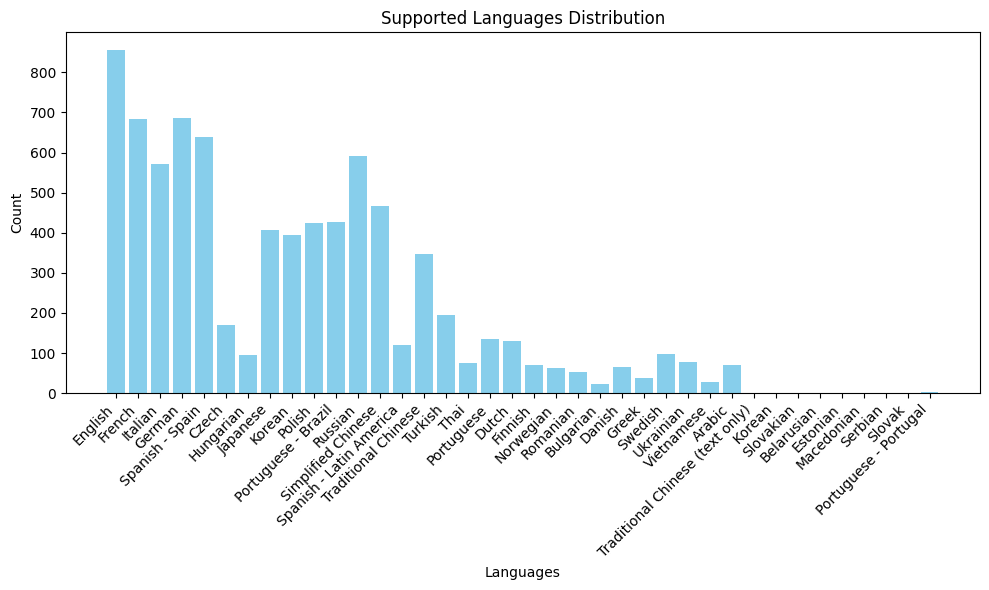

In [11]:
# Bar chart for `supported languages`
# Extract and Flatten Supported Languages
languages_list = []
for languages_str in dataset['supported languages'].dropna():
    # Remove square brackets, single quotes, and spaces, then split
    cleaned_languages = [lang.strip().replace("'", "").replace("[", "").replace("]", "") for lang in languages_str.split(',')]
    languages_list.extend(cleaned_languages)

# Count the Languages
languages_count = Counter(languages_list)

# Plotting with fixed figure size
plt.figure(figsize=(10, 6))
plt.bar(languages_count.keys(), languages_count.values(), color='skyblue')
plt.title("Supported Languages Distribution")
plt.xlabel("Languages")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

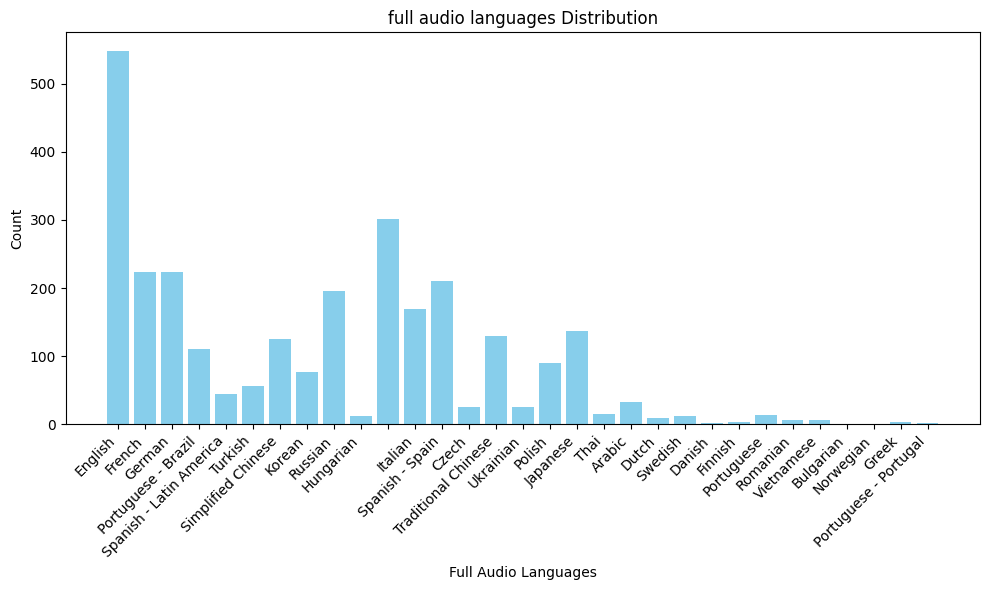

In [12]:
# Bar chart for `full audio languages`
# Extract and Flatten full audio languages
languages_list = []
for languages_str in dataset['full audio languages'].dropna():
    # Remove square brackets, single quotes, and spaces, then split
    cleaned_languages = [lang.strip().replace("'", "").replace("[", "").replace("]", "") for lang in languages_str.split(',')]
    languages_list.extend(cleaned_languages)

# Count the Languages
languages_count = Counter(languages_list)

# Plotting with fixed figure size (as in the original example)
plt.figure(figsize=(10, 6))
plt.bar(languages_count.keys(), languages_count.values(), color='skyblue')
plt.title("full audio languages Distribution")
plt.xlabel("Full Audio Languages")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

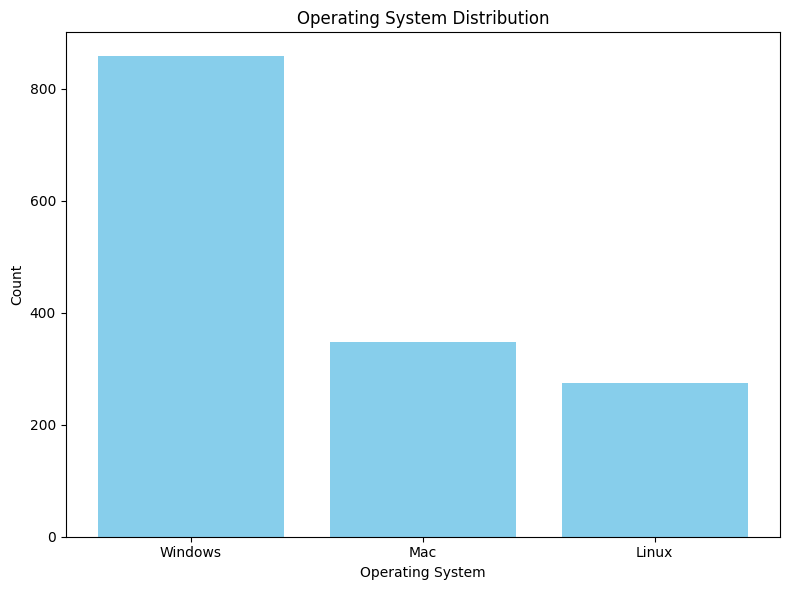

In [13]:
# Bar chart for `windows`, `mac`, `linux`
os_count = {
    'Windows': dataset['windows'].sum(),
    'Mac': dataset['mac'].sum(),
    'Linux': dataset['linux'].sum()
}
plt.figure(figsize=(8, 6))
plt.bar(os_count.keys(), os_count.values(), color='skyblue')
plt.title("Operating System Distribution")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

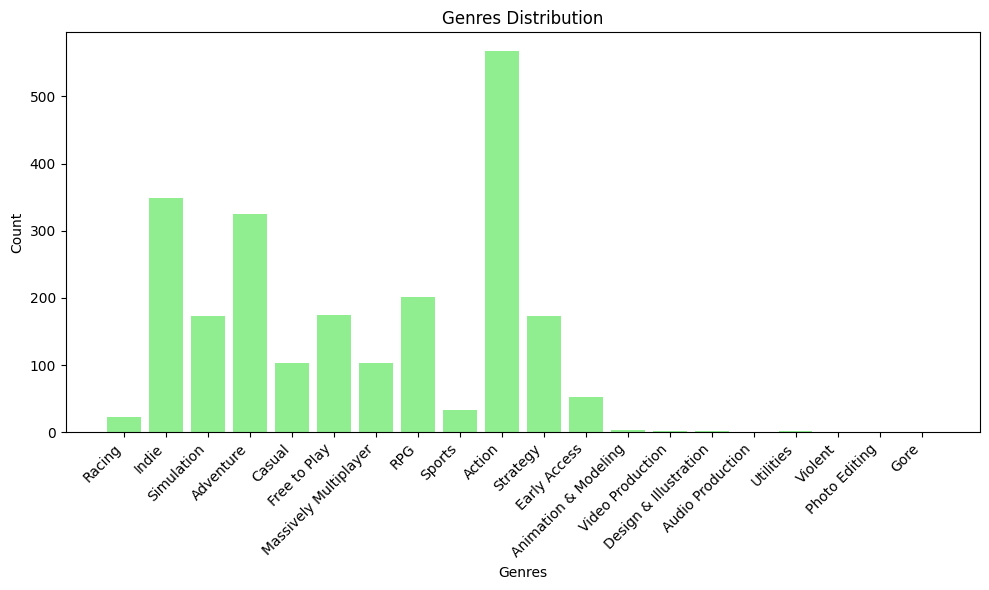

In [14]:
# Bar chart for `genres`
genres_list = [genre for genres in dataset['genres'].dropna() for genre in genres.split(',')]
genres_count = Counter(genres_list)
plt.figure(figsize=(10, 6))
plt.bar(genres_count.keys(), genres_count.values(), color='lightgreen')
plt.title("Genres Distribution")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

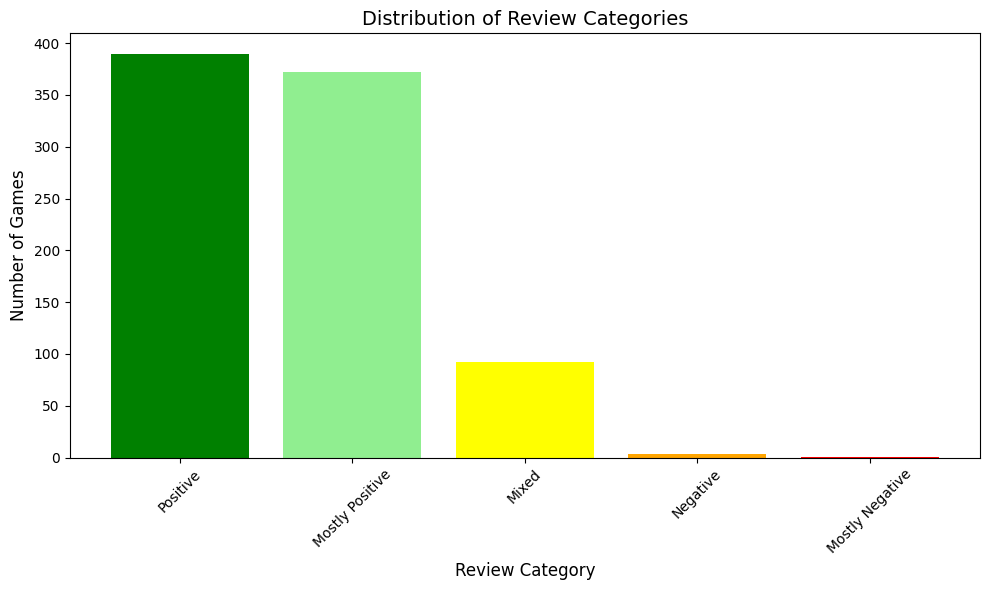

In [13]:
# Define categories for reviews
def categorize_reviews(positive, negative):
    total = positive + negative
    if total == 0:
        return 'No Reviews'
    ratio = positive / total
    if ratio >= 0.9:
        return 'Mostly Positive'
    elif ratio >= 0.7:
        return 'Positive'
    elif ratio >= 0.4:
        return 'Mixed'
    elif ratio >= 0.1:
        return 'Negative'
    else:
        return 'Mostly Negative'

# Count occurrences of each category
review_categories = dataset.apply(lambda row: categorize_reviews(row['positive'], row['negative']), axis=1)
category_counts = review_categories.value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title('Distribution of Review Categories', fontsize=14)
plt.xlabel('Review Category', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

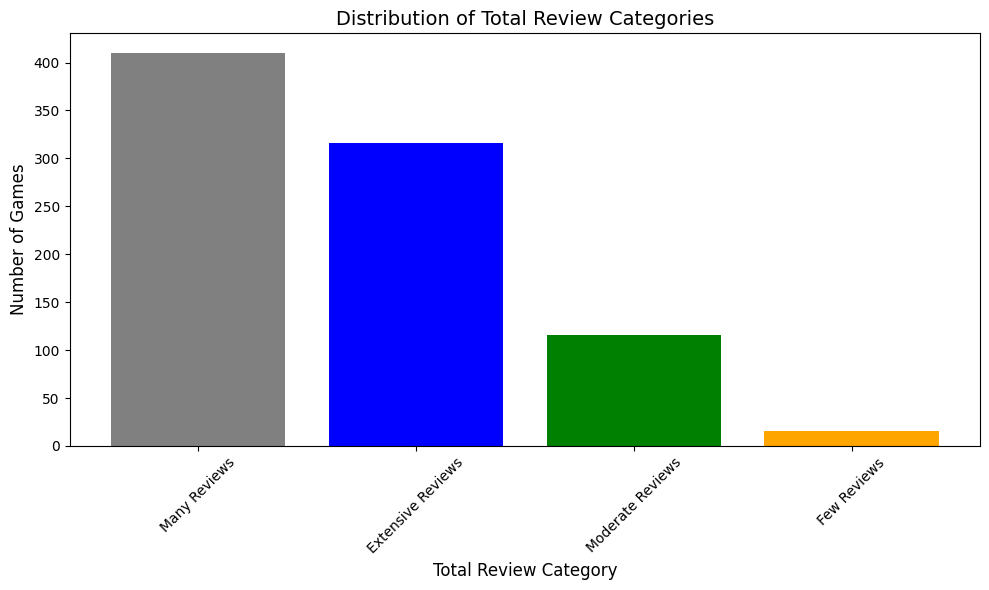

In [16]:
# Define categories for total reviews
def categorize_total_reviews(total_reviews):
    if total_reviews == 0:
        return 'No Reviews'
    elif total_reviews < 1000:
        return 'Few Reviews'
    elif total_reviews < 10000:
        return 'Moderate Reviews'
    elif total_reviews < 50000:
        return 'Many Reviews'
    else:
        return 'Extensive Reviews'

# Count occurrences of total review categories
total_reviews = dataset['positive'] + dataset['negative']
total_review_categories = total_reviews.apply(categorize_total_reviews)
total_category_counts = total_review_categories.value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_category_counts.index, total_category_counts.values, color=['gray', 'blue', 'green', 'orange', 'red'])
plt.title('Distribution of Total Review Categories', fontsize=14)
plt.xlabel('Total Review Category', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [17]:
import ast

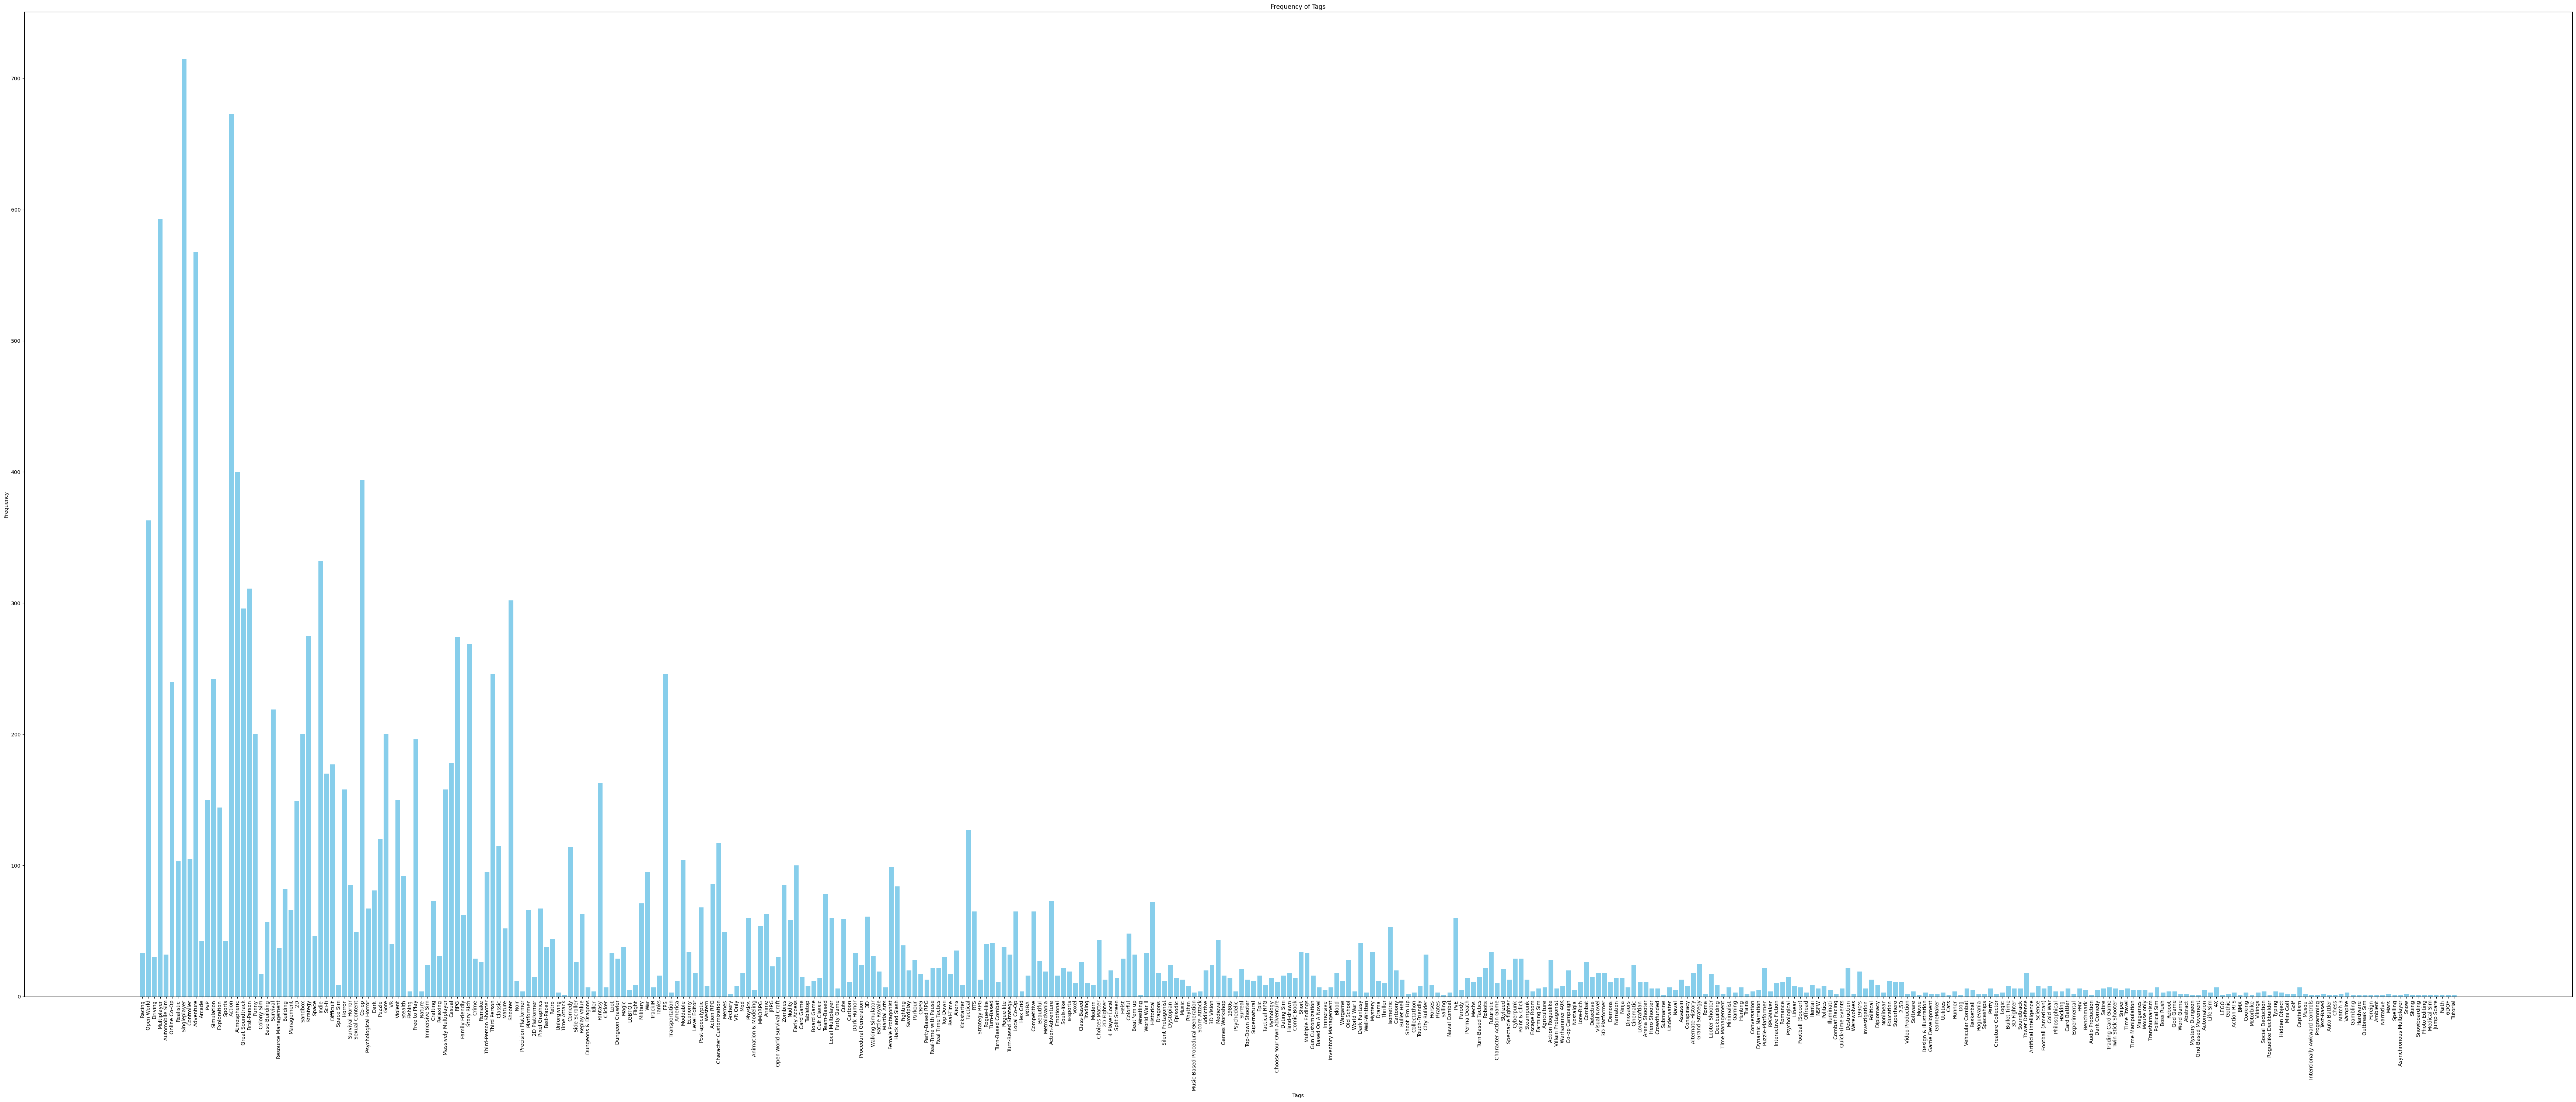

In [18]:
# Replace 'tags_column' with the actual column name containing the tags
tags_column = 'tags'

# Initialize a Counter object to count tag frequencies
tag_counter = Counter()

# Iterate over each row in the column
for row in dataset[tags_column]:
    if isinstance(row, str):  # Ensure the row is a string to parse
        # Convert string representation of dictionary to actual dictionary
        tags_dict = ast.literal_eval(row)
        # Update the Counter with the keys from the dictionary
        tag_counter.update(tags_dict.keys())

# Prepare data for the bar chart
tags = list(tag_counter.keys())
frequencies = list(tag_counter.values())

# Create a bar chart
plt.figure(figsize=(70, 30))
plt.bar(tags, frequencies, color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Tags')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [19]:
import seaborn as sns

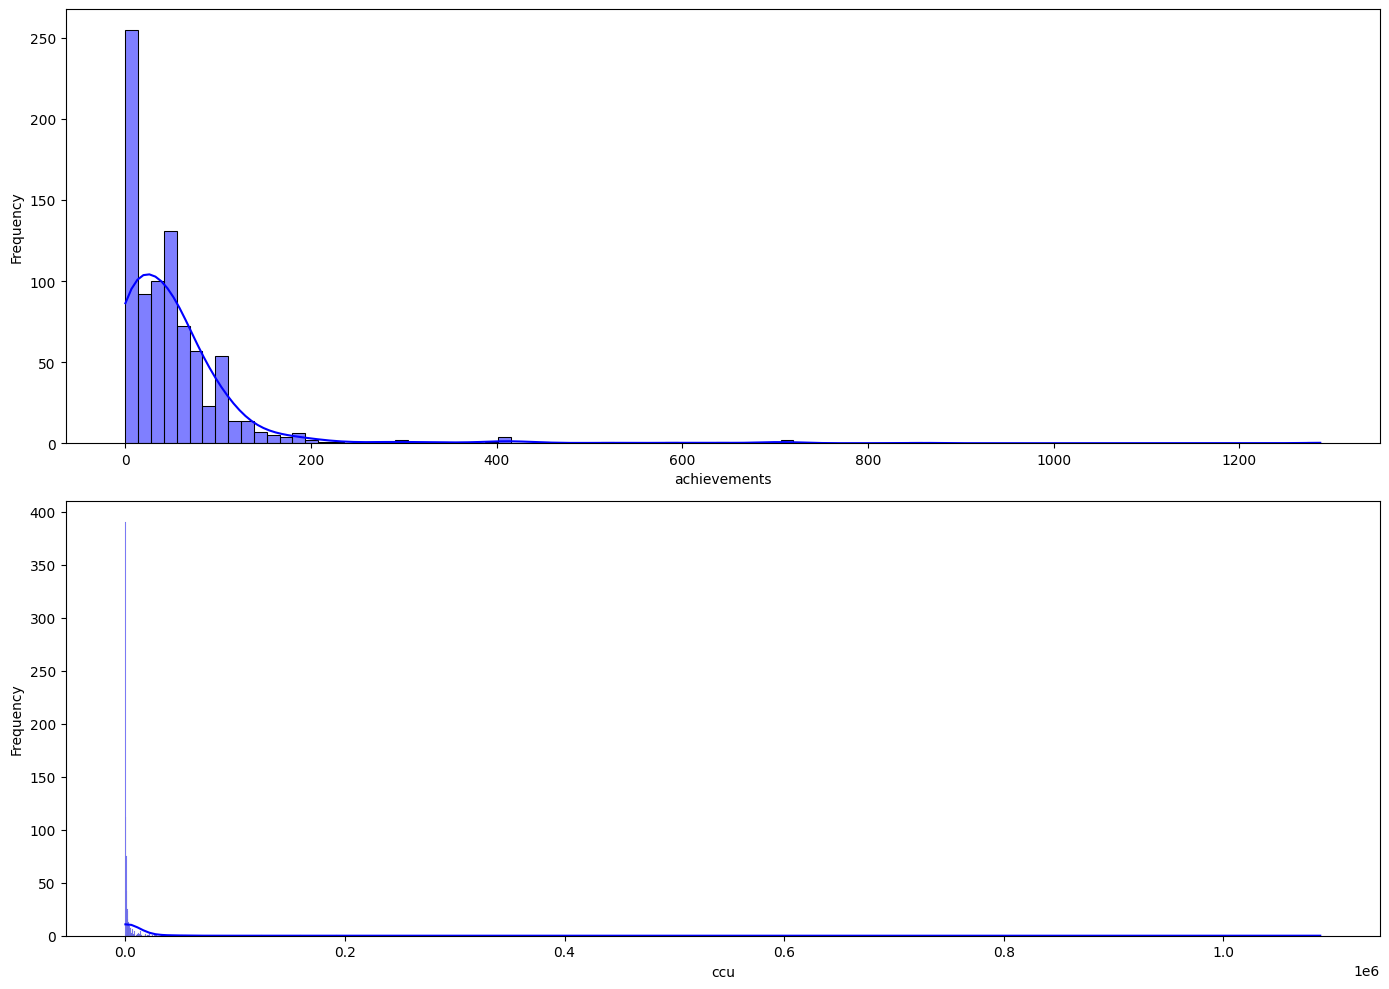

achievements     6.449032
ccu             19.464010
dtype: float64

In [20]:
# Analyze the distributions of 'achievements' and 'ccu'
columns_to_analyze = ['achievements', 'ccu']

# Plot histograms and boxplots to check for skewness and outliers
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for i, col in enumerate(columns_to_analyze):
    # Histogram
    sns.histplot(dataset[col], kde=True, ax=axes[i], color="blue")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Compute skewness
skewness = dataset[columns_to_analyze].skew()
skewness

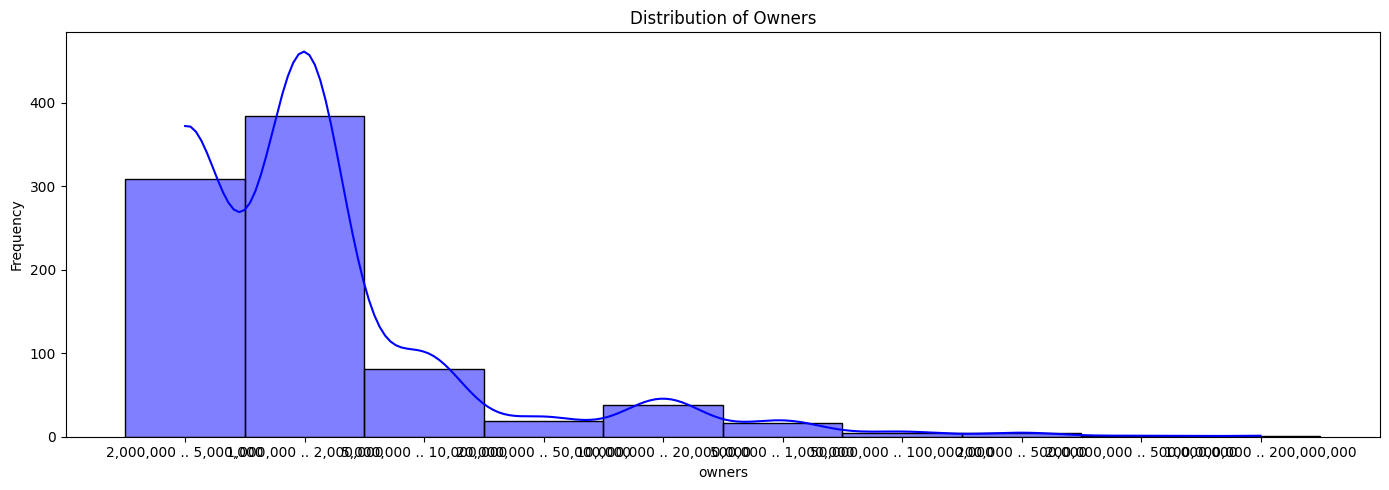

In [28]:
# Plot only the histogram for 'owners'
plt.figure(figsize=(14, 5)) 

sns.histplot(dataset['owners'], kde=True, color="blue")
plt.ylabel("Frequency")
plt.title("Distribution of Owners")

plt.tight_layout()
plt.show()

In [30]:
dataset.head()

,name,supported languages,full audio languages,windows,mac,linux,achievements,genres,price,positive,negative,owners,ccu,tags
0,Forza Horizon 4,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Portuguese - ...",True,False,False,178,Racing,59.99,168343,20609,"2,000,000 .. 5,000,000",8344,"{'Racing': 610, 'Open World': 531, 'Driving': ..."
1,Oxygen Not Included,"['English', 'Simplified Chinese', 'Korean', 'R...","['English', 'Simplified Chinese', 'Korean', 'R...",True,True,True,45,"Indie,Simulation",24.99,99216,3475,"2,000,000 .. 5,000,000",10444,"{'Colony Sim': 2001, 'Base-Building': 1859, 'S..."
2,DEVOUR,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Hungarian']",True,True,False,74,Indie,3.99,58470,5242,"2,000,000 .. 5,000,000",1307,"{'Horror': 1173, 'Online Co-Op': 808, 'Multipl..."
3,Russian Fishing 4,"['English', 'German', 'Russian', 'Simplified C...",[],True,False,False,148,"Adventure,Casual,Free to Play,Massively Multip...",0.00,24793,7914,"2,000,000 .. 5,000,000",11153,"{'Fishing': 661, 'Free to Play': 647, 'Simulat..."
4,Mafia: Definitive Edition,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,43,"Action,Adventure",39.99,50833,7633,"1,000,000 .. 2,000,000",1141,"{'Action': 273, 'Open World': 273, 'Story Rich..."
